In [1]:
import daft

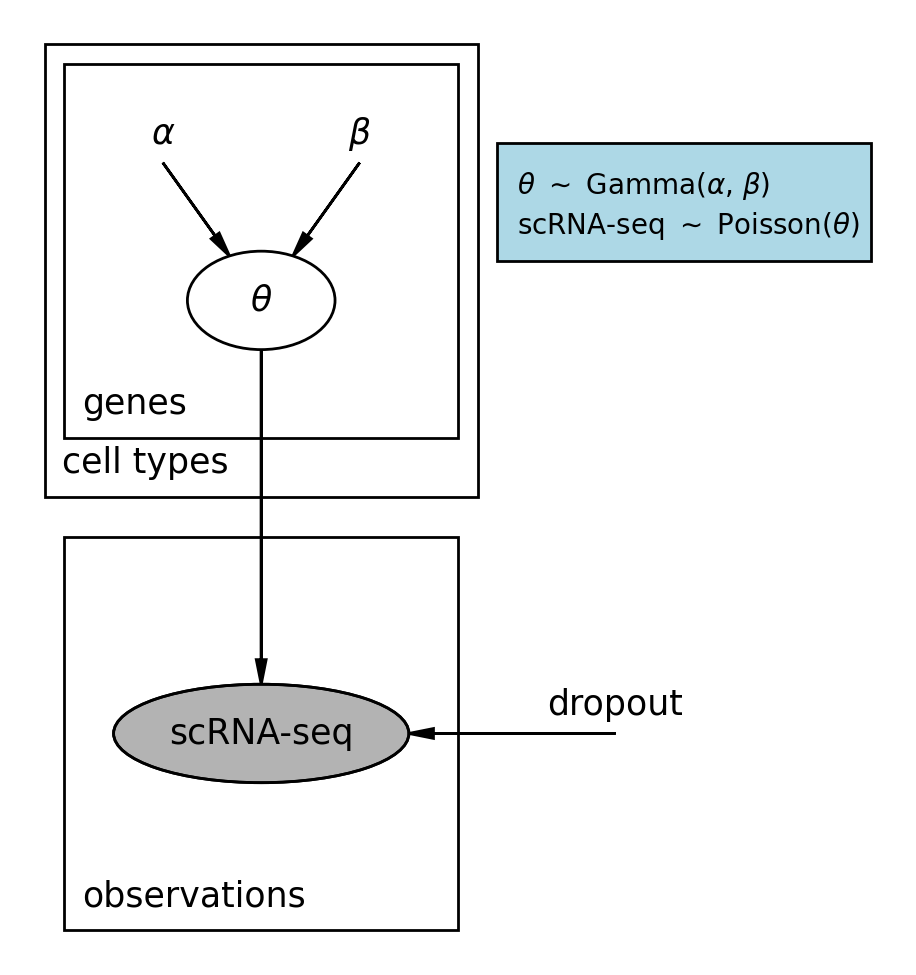

In [2]:
# Gamma
p = daft.PGM(aspect=3, dpi=250, line_width=0.8)

p.add_plate([0, 0.3, 2, 1.9], label="genes")
p.add_plate([-0.1, 0, 2.2, 2.3], label="cell types")
p.add_plate([0, -2.2, 2,2], label="observations")

p.add_node("theta", r"$\theta$", 1, 1, aspect=1.5)
p.add_node("alpha", r"$\alpha$", 0.5, 1.7, scale=0, fixed=True)
p.add_node("beta", r"$\beta$", 1.5, 1.7, scale=0, fixed=True)

p.add_node("scRNA-seq", "scRNA-seq", 1, -1.2, observed=True)

p.add_node("dropout", "dropout", 2.8, -1.2, scale=0, fixed=True)
p.add_edge("dropout", "scRNA-seq")


p.add_edge("alpha", "theta")
p.add_edge("beta", "theta")
p.add_edge("theta", "scRNA-seq")

p.add_plate([2.2, 1.2, 1.9, 0.6], rect_params=dict(facecolor="lightblue"))
p.add_text(2.3, 1.5, r"$\theta$ $\sim$ Gamma($\alpha$, $\beta$)", fontsize=8)
p.add_text(2.3, 1.3, r"scRNA-seq $\sim$ Poisson($\theta$)", fontsize=8)

p.render()
p.savefig("../deconV/figures/gamma.pdf")

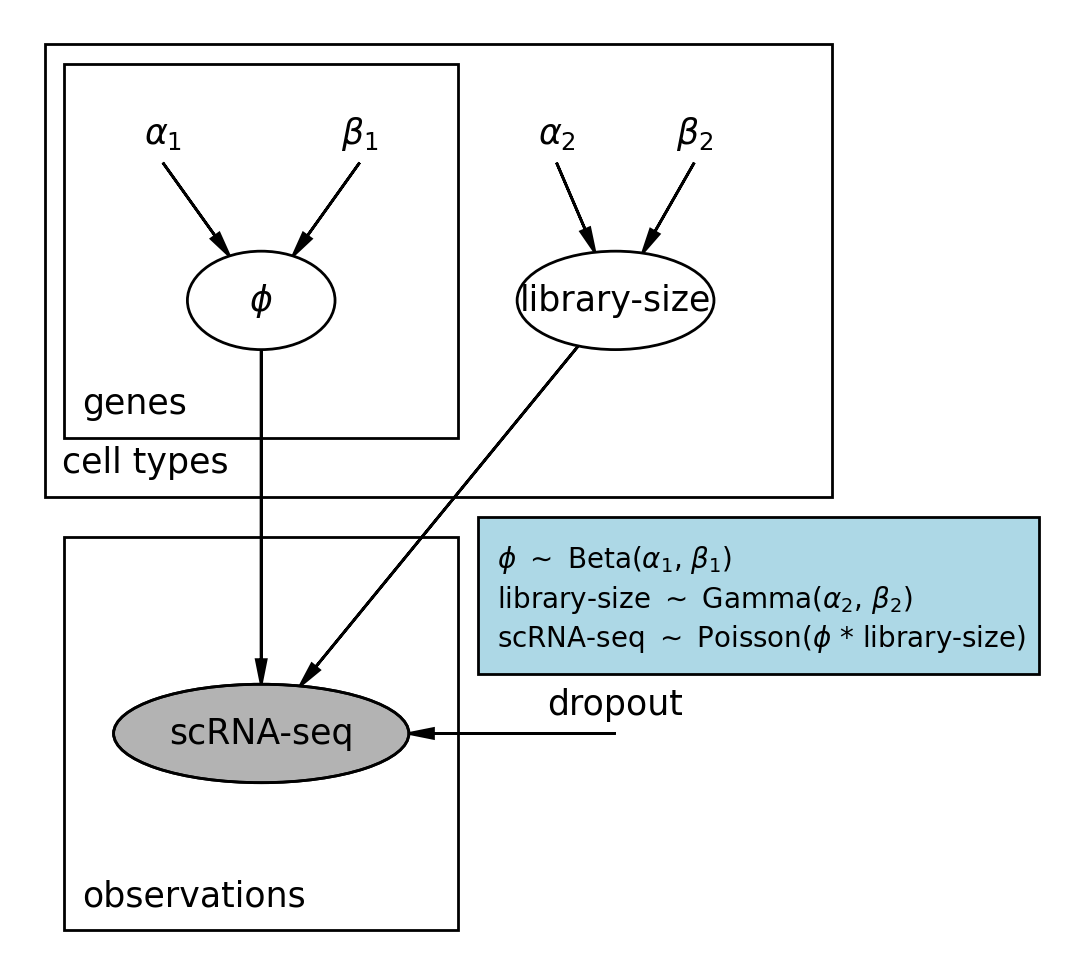

In [10]:
# Beta
p = daft.PGM(aspect=3, dpi=250, line_width=0.8)
p.add_plate([0, 0.3, 2, 1.9], label="genes")
p.add_plate([-0.1, 0, 4, 2.3], label="cell types")
p.add_plate([0, -2.2, 2,2], label="observations")

p.add_node("phi", r"$\phi$", 1, 1, aspect=1.5)
p.add_node("lib_size", "library-size", 2.8, 1, aspect=2.0)

p.add_node("alpha", r"$\alpha_1$", 0.5, 1.7, scale=0, fixed=True)
p.add_node("beta", r"$\beta_1$", 1.5, 1.7, scale=0, fixed=True)
p.add_node("mu_lib_size", r"$\alpha_2$", 2.5, 1.7, scale=0, fixed=True)
p.add_node("std_lib_size", r"$\beta_2$", 3.2, 1.7, scale=0, fixed=True)

p.add_node("scRNA-seq", "scRNA-seq", 1, -1.2, observed=True)
p.add_node("dropout", "dropout", 2.8, -1.2, scale=0, fixed=True)
p.add_edge("dropout", "scRNA-seq")


p.add_edge("alpha", "phi")
p.add_edge("beta", "phi")
p.add_edge("mu_lib_size", "lib_size")
p.add_edge("std_lib_size", "lib_size")
p.add_edge("lib_size", "scRNA-seq")
p.add_edge("phi", "scRNA-seq")

p.add_plate([2.1, -0.9, 2.85, 0.8], rect_params=dict(facecolor="lightblue"))
p.add_text(2.2, -0.4, r"$\phi$ $\sim$ Beta($\alpha_1$, $\beta_1$)", fontsize=8)
p.add_text(2.2, -0.6, r"library-size $\sim$ Gamma($\alpha_2$, $\beta_2$)", fontsize=8)
p.add_text(2.2, -0.8, r"scRNA-seq $\sim$ Poisson($\phi$ * library-size)", fontsize=8)

p.render()
p.savefig("../deconV/figures/beta.pdf")

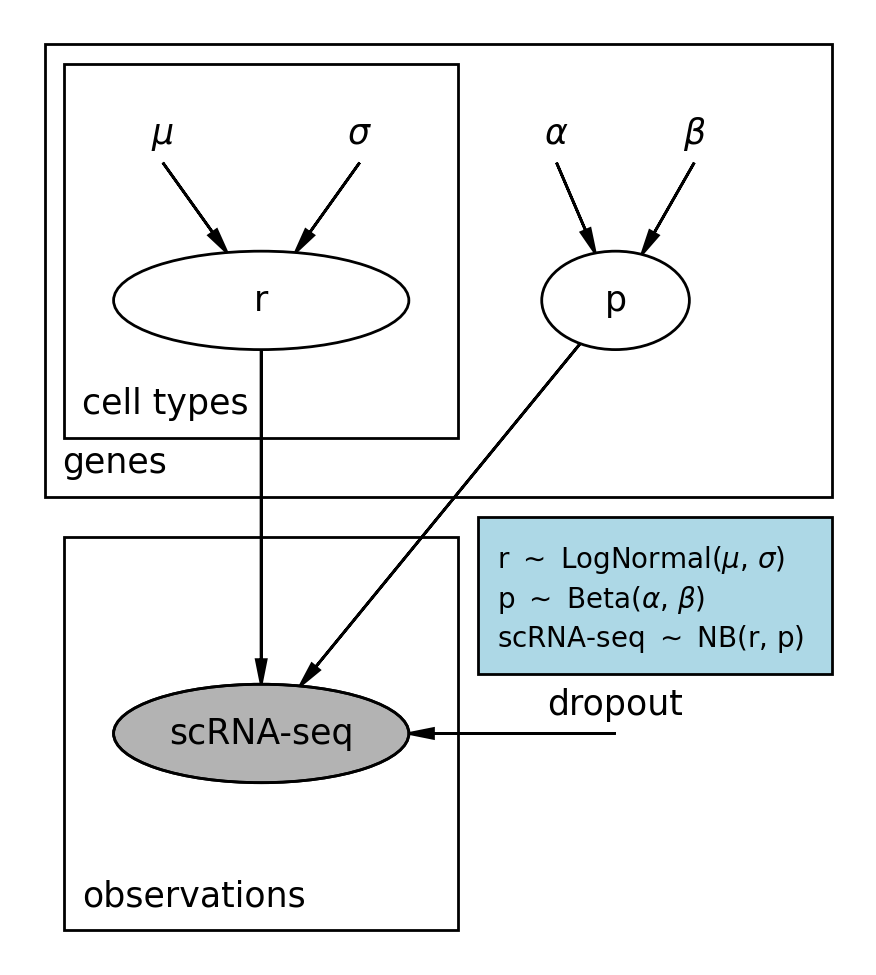

In [4]:
# NB
p = daft.PGM(aspect=3, dpi=250, line_width=0.8)
p.add_plate([0, 0.3, 2, 1.9], label="cell types")
p.add_plate([-0.1, 0, 4, 2.3], label="genes")
p.add_plate([0, -2.2, 2,2], label="observations")

p.add_node("p", "p", 2.8, 1, aspect=1.5)

p.add_node("alpha", r"$\alpha$", 2.5, 1.7, scale=0, fixed=True)
p.add_node("beta", r"$\beta$", 3.2, 1.7, scale=0, fixed=True)
p.add_node("r", "r", 1, 1)
p.add_node("mu_r", r"$\mu$", 0.5, 1.7, scale=0, fixed=True)
p.add_node("std_r", r"$\sigma$", 1.5, 1.7, scale=0, fixed=True)

p.add_node("scRNA-seq", "scRNA-seq", 1, -1.2, observed=True)

p.add_node("dropout", "dropout", 2.8, -1.2, scale=0, fixed=True)
p.add_edge("dropout", "scRNA-seq")

p.add_edge("alpha", "p")
p.add_edge("beta", "p")

p.add_edge("mu_r", "r")
p.add_edge("std_r", "r")

p.add_edge("r", "scRNA-seq")
p.add_edge("p", "scRNA-seq")

p.add_plate([2.1, -0.9, 1.8, 0.8], rect_params=dict(facecolor="lightblue"))
p.add_text(2.2, -0.4, r"r $\sim$ LogNormal($\mu$, $\sigma$)", fontsize=8)
p.add_text(2.2, -0.6, r"p $\sim$ Beta($\alpha$, $\beta$)", fontsize=8)
p.add_text(2.2, -0.8, r"scRNA-seq $\sim$ NB(r, p)", fontsize=8)

p.render()
p.savefig("../deconV/figures/nb.pdf")

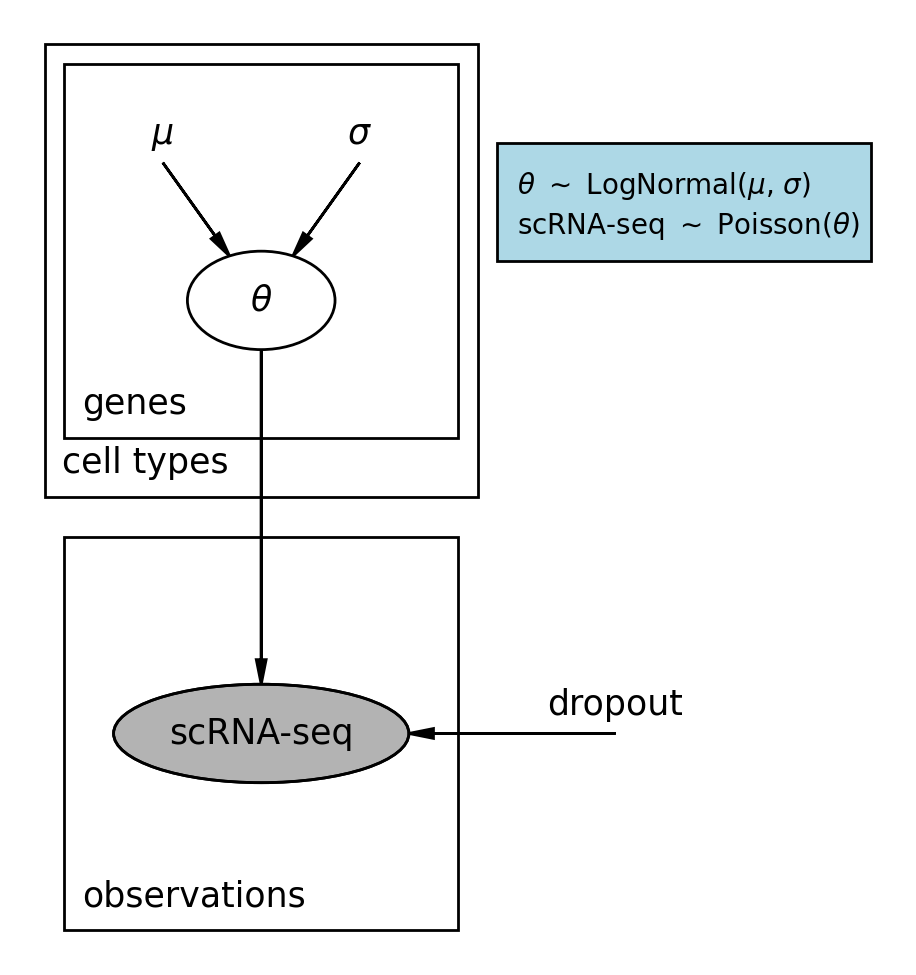

In [5]:
# LogNormal
p = daft.PGM(aspect=3, dpi=250, line_width=0.8)
p.add_plate([0, 0.3, 2, 1.9], label="genes")
p.add_plate([-0.1, 0, 2.2, 2.3], label="cell types")
p.add_plate([0, -2.2, 2,2], label="observations")

p.add_node("theta", r"$\theta$", 1, 1, aspect=1.5)

p.add_node("mu", r"$\mu$", 0.5, 1.7, scale=0, fixed=True)
p.add_node("sigma", r"$\sigma$", 1.5, 1.7, scale=0, fixed=True)

p.add_node("scRNA-seq", "scRNA-seq", 1, -1.2, observed=True)

p.add_node("dropout", "dropout", 2.8, -1.2, scale=0, fixed=True)
p.add_edge("dropout", "scRNA-seq")

p.add_edge("mu", "theta")
p.add_edge("sigma", "theta")
p.add_edge("theta", "scRNA-seq")

p.add_plate([2.2, 1.2, 1.9, 0.6], rect_params=dict(facecolor="lightblue"))
p.add_text(2.3, 1.5, r"$\theta$ $\sim$ LogNormal($\mu$, $\sigma$)", fontsize=8)
p.add_text(2.3, 1.3, r"scRNA-seq $\sim$ Poisson($\theta$)", fontsize=8)

p.render()
p.savefig("../deconV/figures/lognormal.pdf")

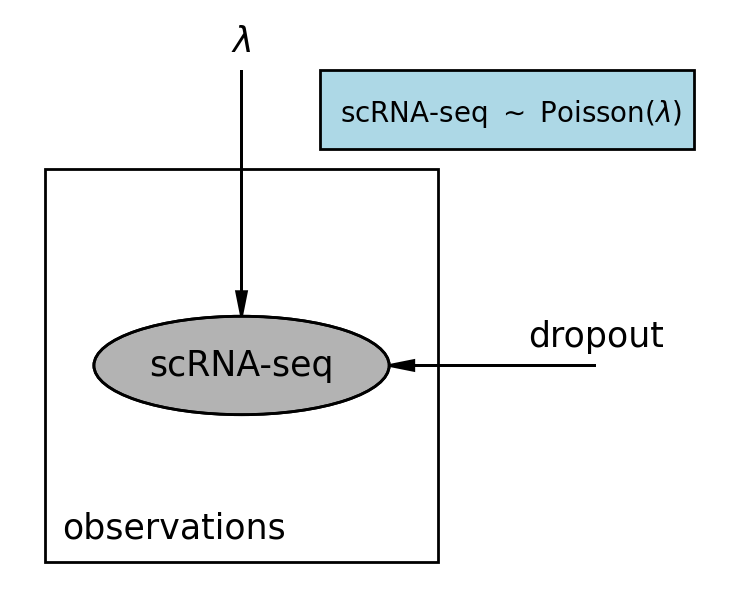

In [6]:
# Static
p = daft.PGM(aspect=3, dpi=250, line_width=0.8)
p.add_plate([0, 0, 2,2], label="observations")


p.add_node("mu", r"$\lambda$", 1.0, 2.5, scale=0, fixed=True)

p.add_node("scRNA-seq", "scRNA-seq", 1, 1, observed=True)

p.add_node("dropout", "dropout", 2.8, 1, scale=0, fixed=True)
p.add_edge("dropout", "scRNA-seq")

p.add_edge("mu", "scRNA-seq")
p.add_plate([1.4, 2.1, 1.9, 0.4], rect_params=dict(facecolor="lightblue"))
p.add_text(1.5, 2.2, r"scRNA-seq $\sim$ Poisson($\lambda$)", fontsize=8)

p.render()
p.savefig("../deconV/figures/static.pdf")